# Task 2: Model Baseline and Data preparation

**Course:** Introduction to Data Science
**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [1198]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [1199]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [1200]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [1201]:
# 'dteday' is not neccessary

train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [1202]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [1203]:
# Check the split

train_features
# train_labels

# test_features
# test_labels

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets
0,154,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991
1,685,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601
2,368,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549
3,472,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740
4,442,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022
596,81,1.0,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551
597,377,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520
598,299,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605


### 1.3. Linear Regresion

In [1204]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [1205]:
# Predict all test examples
ypred = baseline_model.predict(test_features)
ypred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

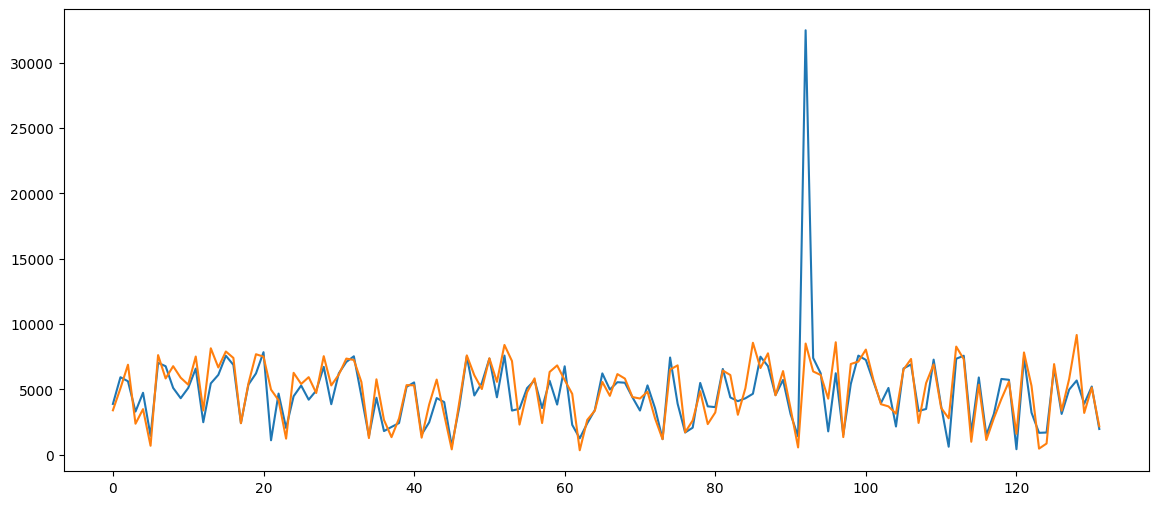

In [1206]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(ypred)

In [1207]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1246]:
print(round(ypred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


### 1.4. Evaluate Baseline model

In [1208]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248


## 2. Preprocessing

In [1209]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 2.1. Train Data Preprocessing

In [1210]:
#hum has to many outliers
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [1211]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [1212]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [1213]:
train_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836


In [1214]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek
train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int32

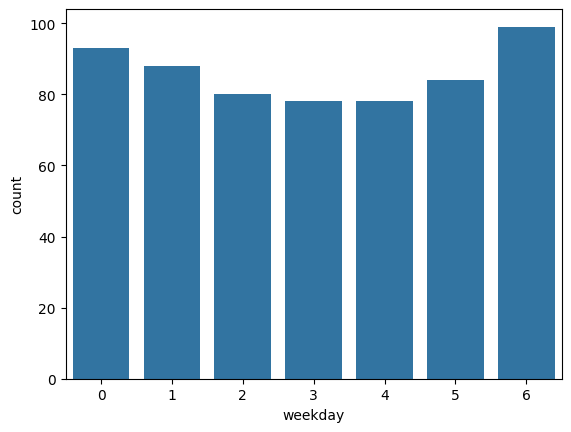

In [1215]:
sns.countplot(x='weekday', data=train_df)
plt.show()

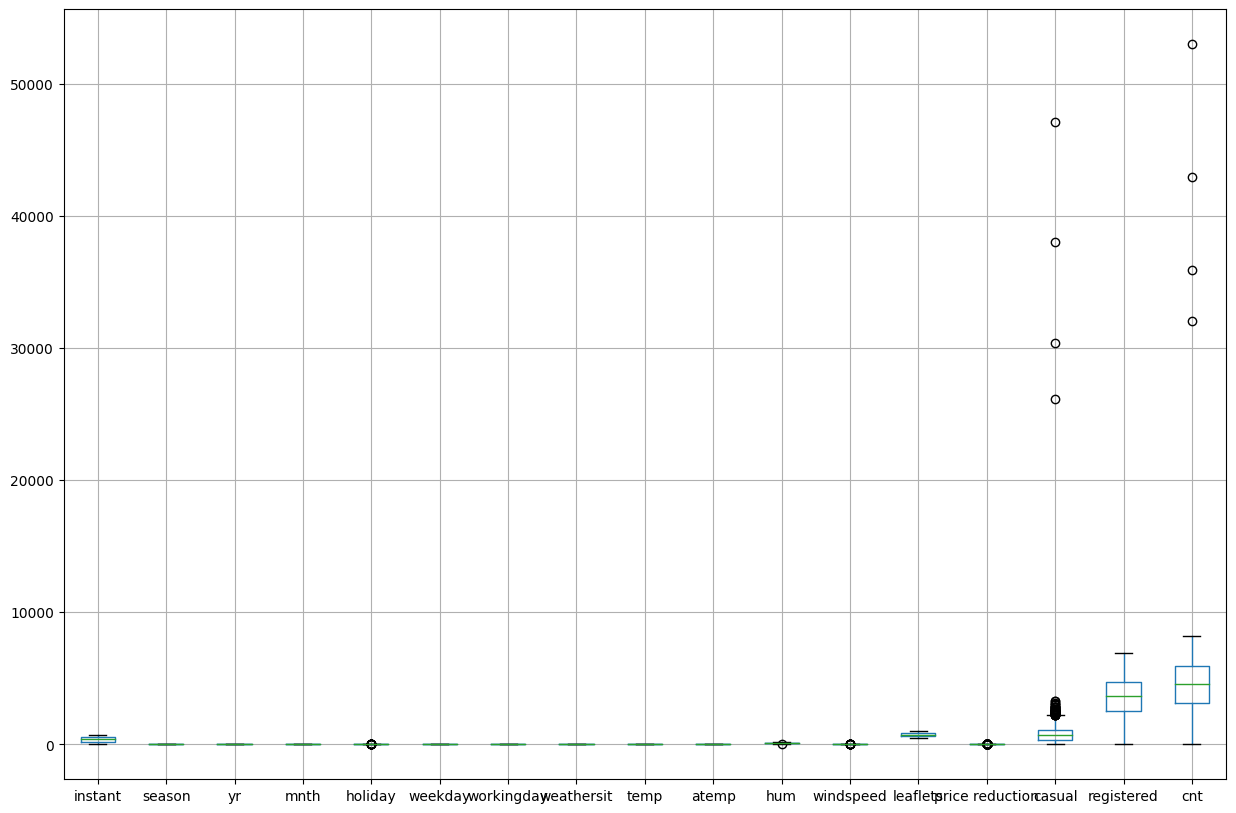

In [1216]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

In [1217]:
#filter the df based on the quantile (still have to figure out, which quantile percentage is the right one)
q = train_df["casual"].quantile(0.95)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = train_df[train_df['casual'] < q]

2455.999999999998


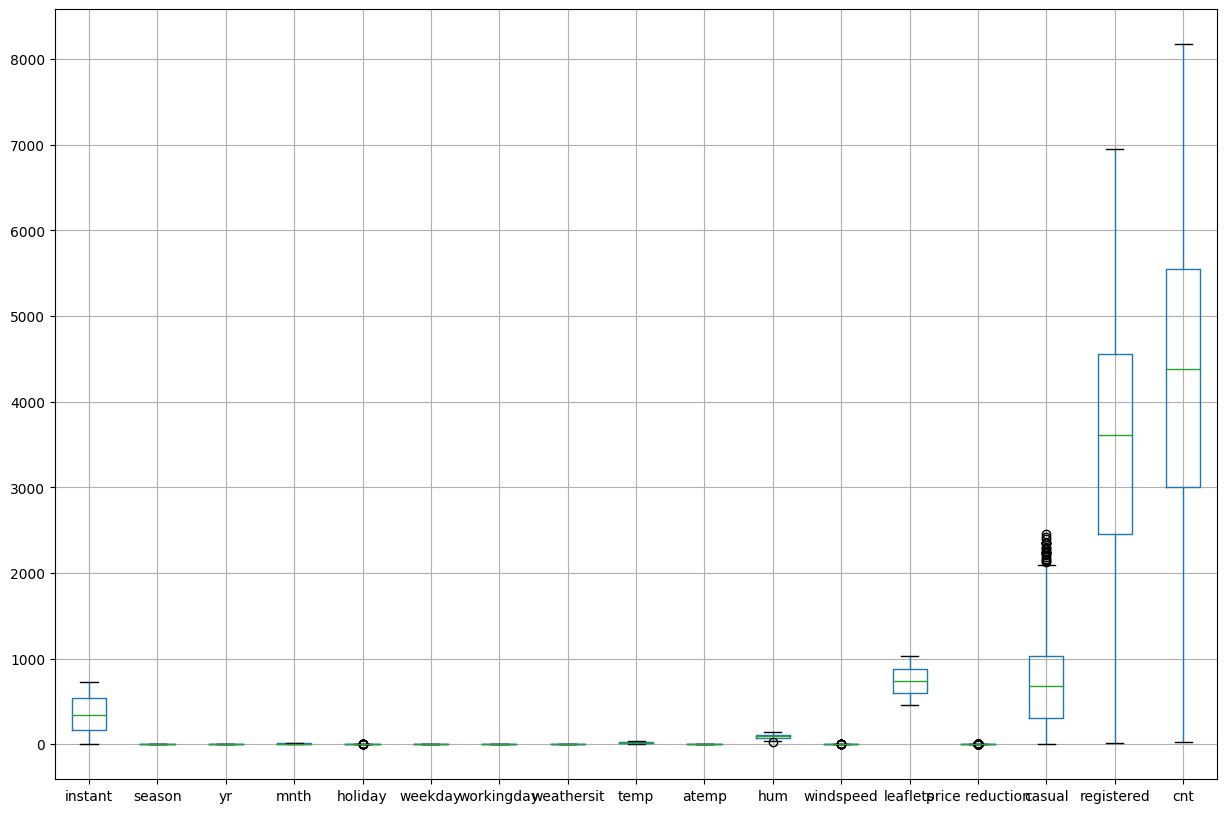

In [1218]:
boxplot = handeled_df.boxplot(figsize=(15, 10))
plt.show()

In [1219]:
q = handeled_df["casual"].quantile(0.959)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df_2 = handeled_df[handeled_df['casual'] < q]

2065.3249999999953


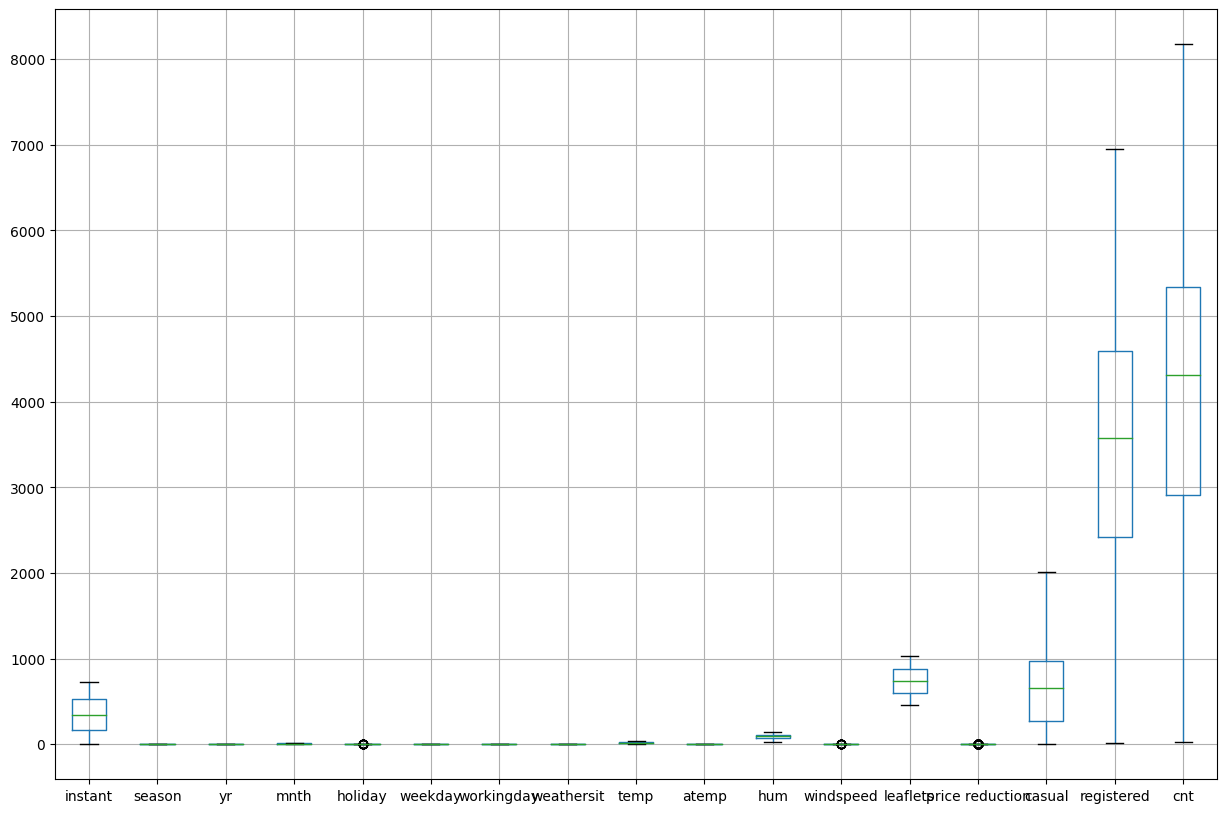

In [1220]:
boxplot = handeled_df_2.boxplot(figsize=(15, 10))
plt.show()

In [1221]:
feature_handeled_df = handeled_df.iloc[:, :13]
feature_handeled_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,154,03.06.2011,2.0,0,6,0,0,1,1,24.8000,0.587133,53.12505,0.253121
1,685,15.11.2012,4.0,1,11,0,6,1,2,12.8667,0.324492,93.06255,0.152987
2,368,03.01.2012,1.0,1,1,0,1,1,1,6.0000,0.126275,66.18750,0.365671
3,472,16.04.2012,2.0,1,4,1,0,0,1,26.5667,0.614925,84.25005,0.284829
5,257,14.09.2011,3.0,0,9,0,4,1,1,26.9333,0.626900,104.56245,0.167300


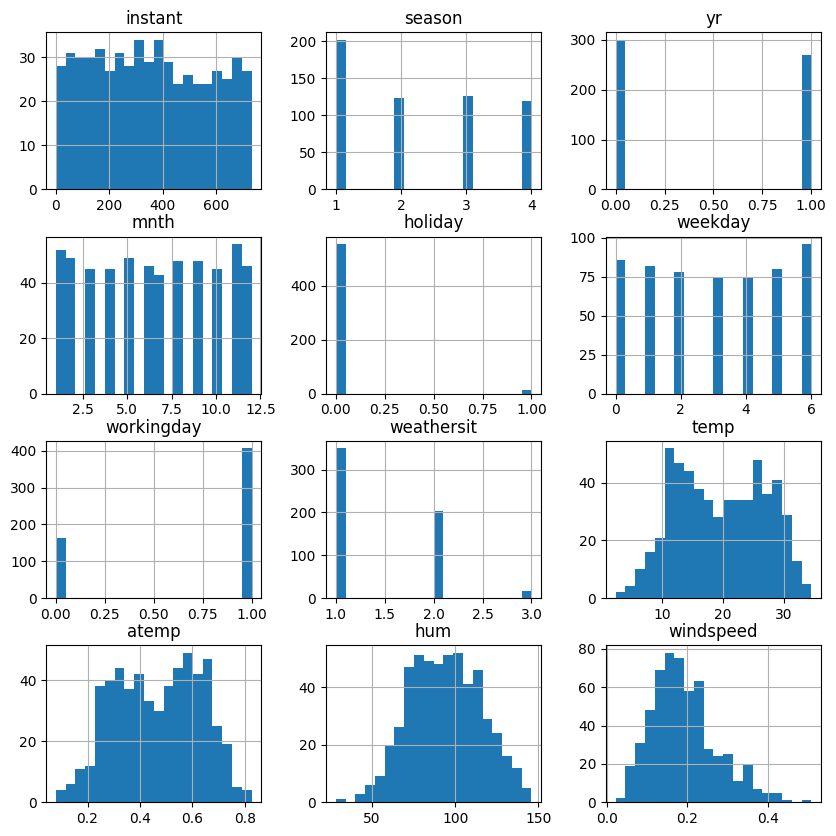

In [1222]:
# histogram plot
hist = feature_handeled_df.hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

C:\Users\Akira\AppData\Local\Temp\ipykernel_20060\458554020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']


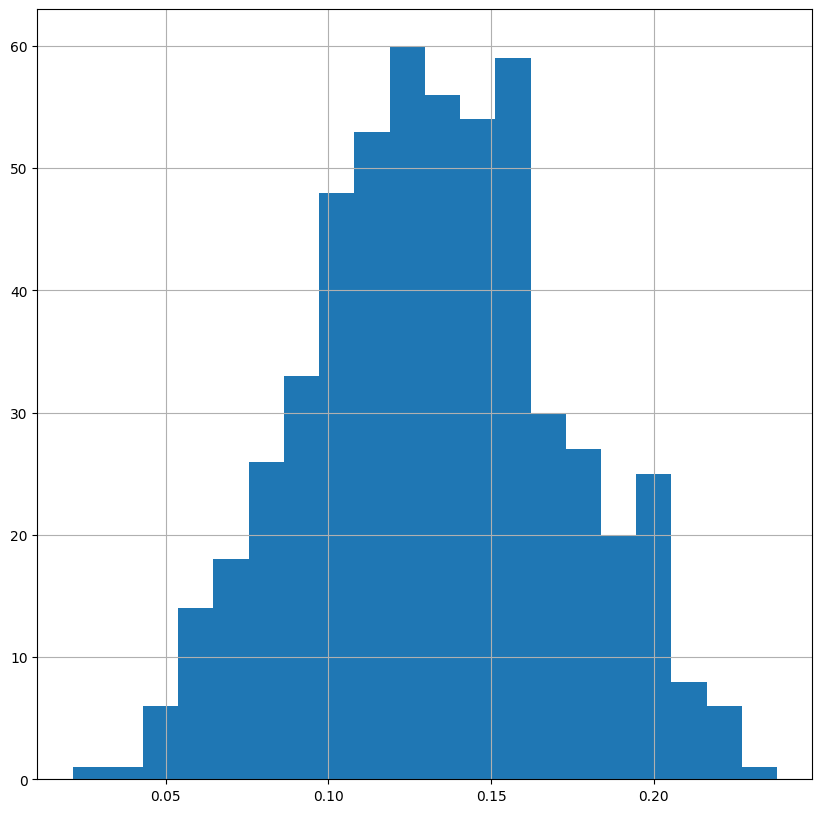

In [1223]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(feature_handeled_df['windspeed'].array.reshape(-1, 1)))


feature_handeled_df['windspeed ptransformed']=trans_temp
handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']
hist = handeled_df_2['windspeed'].hist(bins=20,figsize=(10, 10))

In [1224]:
handeled_df_2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,0,1,1,24.8000,0.587133,53.12505,0.164725,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,6,1,2,12.8667,0.324492,93.06255,0.116226,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,1,1,1,6.0000,0.126275,66.18750,0.203743,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,0,0,1,26.5667,0.614925,84.25005,0.177099,740,0,1198,5172,6370
5,257,14.09.2011,3.0,0,9,0,4,1,1,26.9333,0.626900,104.56245,0.124185,761,0,647,4138,4785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,2,0,1,18.9000,0.466525,56.87505,0.204468,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,3,0,5,1,1,17.6667,0.440642,93.68745,0.153002,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,3,1,2,15.3000,0.381938,120.43755,0.131432,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.113733,605,0,404,3490,3894


### 2.2. Test Data Preprocessing

In [1225]:
#Again, alot of hum values are over 100, so we have some outliers here
print(len(test_df[test_df["hum"] > 100]))

45


In [1226]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

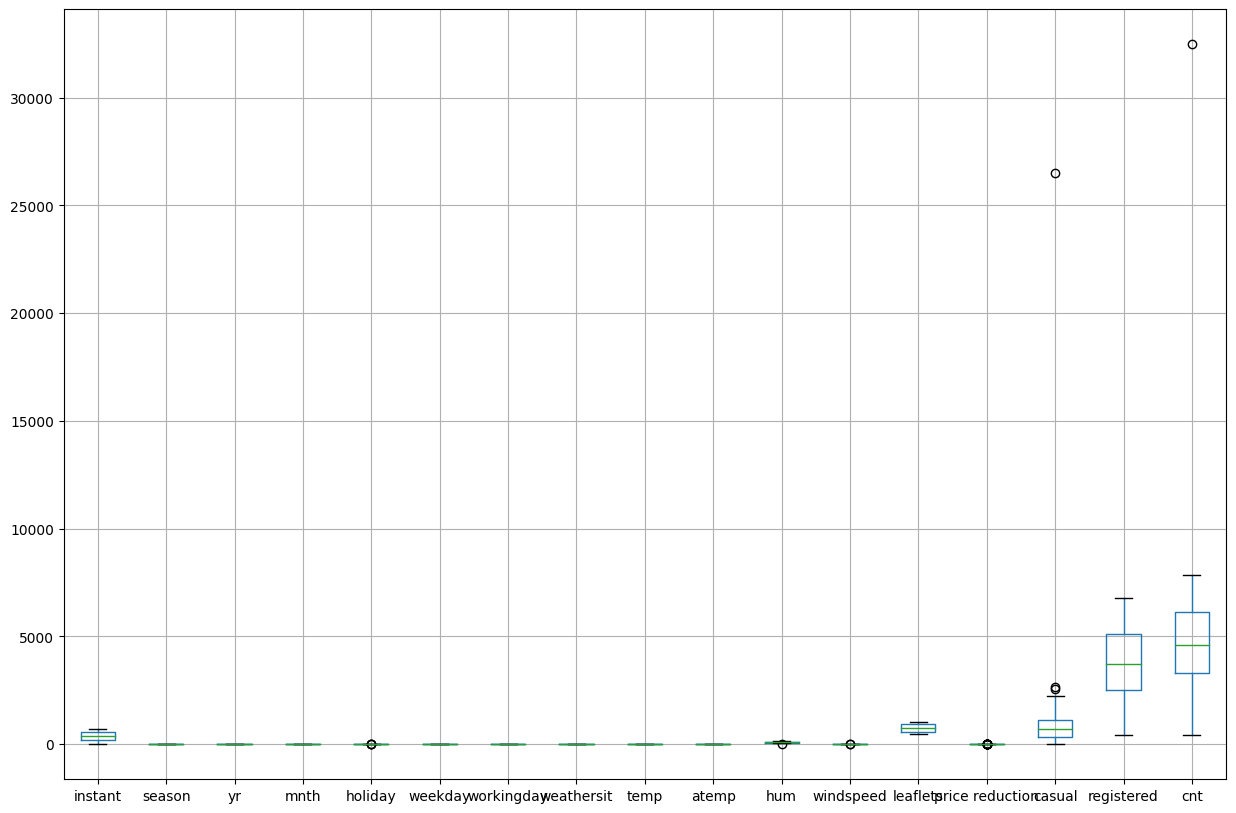

In [1227]:
boxplot = test_df.boxplot(figsize=(15, 10))
plt.show()

In [1228]:
feature_test_df = test_df.iloc[:, :13]
feature_test_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.148642
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.312139
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.179729
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.063450
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.110087


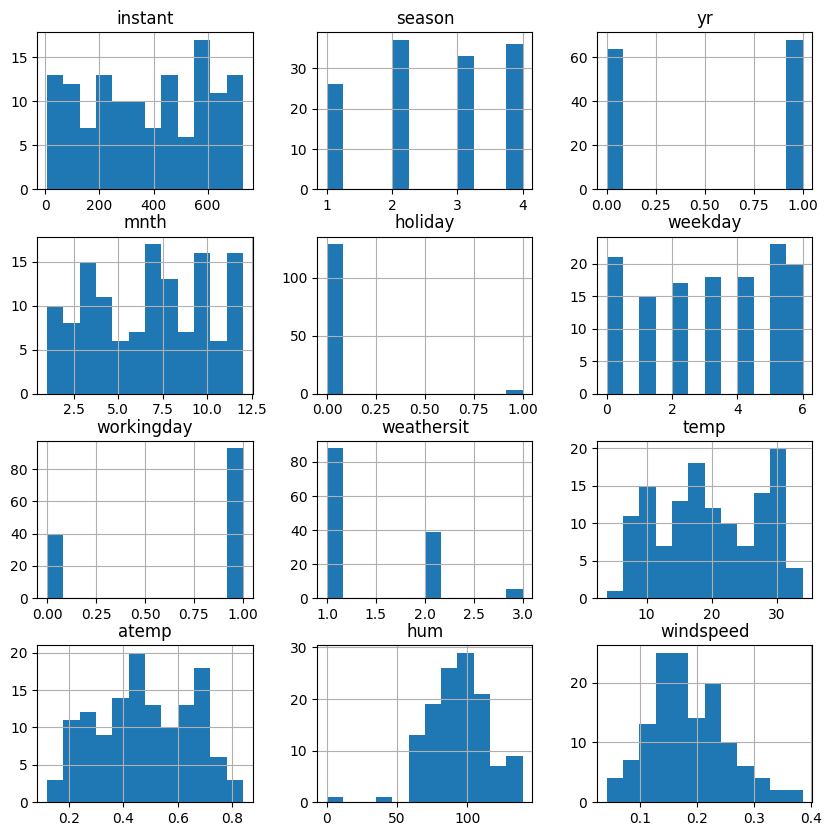

In [1229]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

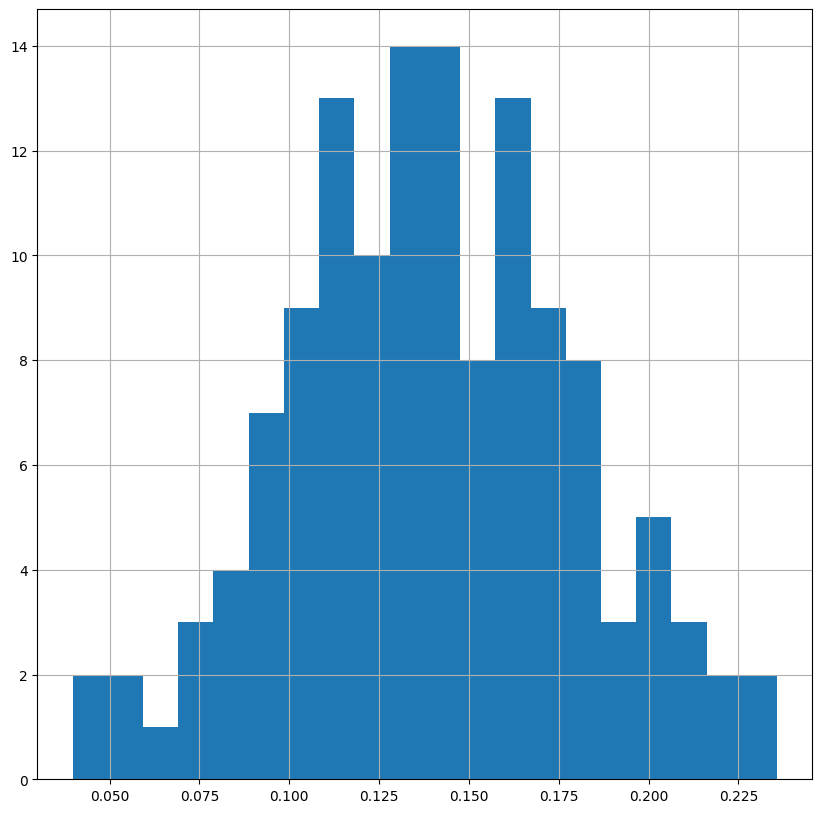

In [1230]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].array.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(10, 10))

In [1231]:
test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.120161,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.206779,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.139545,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.057694,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.093734,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,6,1,1,19.4333,0.475371,92.31255,0.166143,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,0,0,1,30.6000,0.687508,90.18750,0.128105,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,4,1,2,25.4000,0.575158,127.31250,0.120153,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,5,1,1,29.1333,0.654688,74.68755,0.183799,585,0,848,4377,5225


### 2.3. Feature Selecting

In [1232]:
modelA_train_data = train_df.drop('hum', axis=1).drop('dteday', axis=1)
modelA_test_data = test_df.drop('hum', axis=1).drop('dteday', axis=1)



## 3. New Linear Regression Model

### 3.1. Split

In [1245]:
# Splitting the train data into features and labels
modelA_train_features = modelA_train_data.iloc[:, :12]
modelA_train_labels = modelA_train_data.iloc[:, -1:]

# Splitting the test data into features and labels
modelA_test_features = modelA_test_data.iloc[:, :12]
modelA_test_labels = modelA_test_data.iloc[:, -1:]

# modelA_train_features
# modelA_train_labels
# modelA_test_features
modelA_test_labels

,cnt
0,3894
1,5936
2,5629
3,3310
4,4748
...,...
127,4990
128,5687
129,3907
130,5225


### 3.2. Linear Regression A

In [1234]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
A_model = linear_model.LinearRegression()

A_model.fit(modelA_train_features, modelA_train_labels)

print(A_model.coef_)

[[-1.43480347e+00  2.72383299e+02  3.03522514e+03  7.34244946e+01
  -1.30219705e+03  2.88108323e+01 -4.62283808e+02 -9.16925432e+02
   3.72024545e+01  5.45293840e+03 -1.68453118e+03  1.06969106e+00]]


In [1235]:
# Predict all test examples
Apred = A_model.predict(modelA_test_features)
Apred

array([[3283.03812083],
       [5403.16416405],
       [6289.43922028],
       [3057.07955527],
       [3502.21655522],
       [1077.91644197],
       [7981.55383338],
       [6260.62265488],
       [6346.63557548],
       [5992.03580001],
       [5404.72842686],
       [8170.62184802],
       [2772.72267044],
       [8804.19820492],
       [7350.61785464],
       [8256.59950782],
       [7879.1395592 ],
       [3080.07950266],
       [5308.24535308],
       [7981.39208381],
       [6972.38398453],
       [4496.29101569],
       [4294.88751293],
       [1581.08321805],
       [5842.16791465],
       [5925.57951898],
       [5354.1826427 ],
       [5320.47902136],
       [7513.83180737],
       [5771.43691829],
       [6691.23107908],
       [7748.85437892],
       [7362.62111117],
       [5132.38415885],
       [1048.72927099],
       [5062.83155895],
       [2794.96307783],
       [2222.94531595],
       [3279.8879098 ],
       [5057.16052377],
       [5027.50973175],
       [1142.013

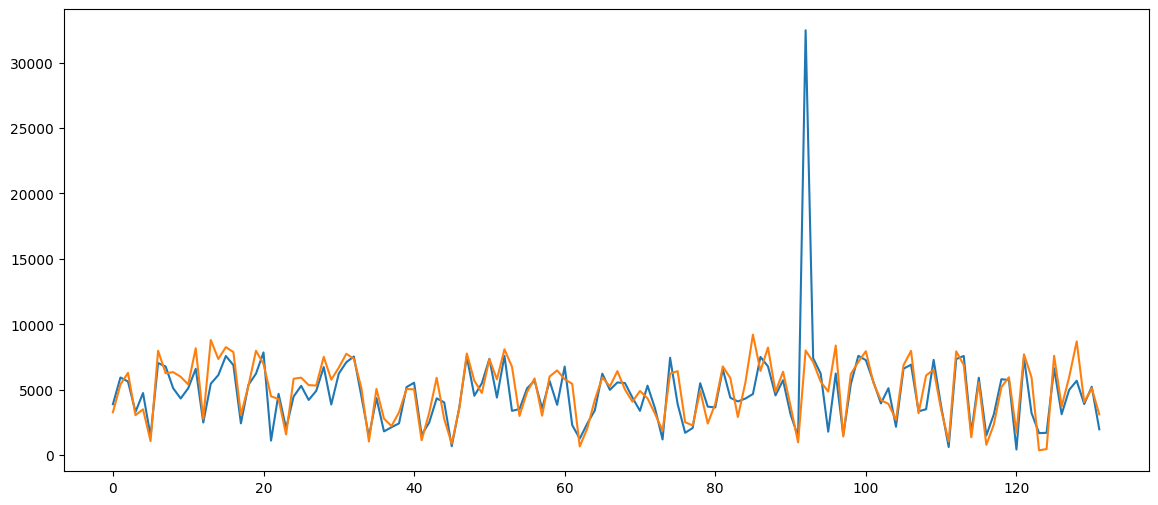

In [1240]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(modelA_test_labels)
plt.plot(Apred)

In [1237]:
print(f"Predict label for following example:\n{modelA_test_features.iloc[0,:]}")

#Predict a single value
predicted_value = A_model.predict([modelA_test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", modelA_test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - modelA_test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         2.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
windspeed       0.120161
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3283.03812083]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -610.961879
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1238]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(modelA_test_labels, Apred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ", A_model.score(modelA_test_features, modelA_test_labels))

MAE: 1074.655
R^2 value of the model:  0.37892238423277735
